In [1]:
#pip3 install google.colab
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

###  Libraries

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

import torch

import os
import sys

from MLP import MLP
from Datasets_Functions import *
from Visualization import Visualization
from Evaluations.Evaluation import Evaluator

/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Global Variables

In [3]:
path_to_module = './' # 'C:\\Users\\PAPASOFT INC\\Desktop\\SOFT_SIL'
sys.path.append(path_to_module)
os.environ['OMP_NUM_THREADS'] = '1'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)

### Load datasets

In [4]:
hashMapFilePath = path_to_module 
#updateHashMap("R15",{'batch_size': 50, 'n_clusters': 15, 'module_name': 'datasets.datasets_New', 'function_name': 'load_R15_dataloader', 'option_name': ''},hashMapFilePath)
hashMap = getHashMap(hashMapFilePath)
print(hashMap.keys())
dataset_name = "R3"
datasetProperties = hashMap[dataset_name]
print(datasetProperties)
batch_size = datasetProperties['batch_size'] #= 30
n_clusters = datasetProperties['n_clusters'] #= 3
datasetProperties['module_name'] = 'Datasets.Datasets'
dataloader, input_dim, data_np, labels = functionGetDataset(datasetProperties)
print('Data_Shape is:', input_dim)
print('Batches Number is:',len(dataloader))

dict_keys(['10x73k', 'TCGA', 'coil20', 'eMNIST_balanced_letters', 'eMNIST_mnist', 'eMNIST_balanced_digits', 'Dermatology', 'Ecoil', 'Iris', 'Rings', 'Wine', 'Australian', 'Moons', 'Squeezed_Gauss', 'Gauss_Densities', 'Pendigits', 'fashionMNIST', '3DSpheres', '20_NewsGroups', 'COIL20', 'CIFAR10', 'STL10', 'R15', 'R3'])
{'batch_size': 100, 'n_clusters': 3, 'module_name': 'datasets.datasets_New', 'function_name': 'load_R3_dataloader', 'option_name': ''}
Data_Shape is: 2
Batches Number is: 15


### Parameters

In [5]:
# Batch Size and Number of Clusters
batch_size = datasetProperties['batch_size']
n_clusters = datasetProperties['n_clusters']

# Training Epochs and Learning Rate
lr = 1e-3
n_epochs = 50
entr_lambda = 100

kmeans_initialization = True

### Create MLP model

In [6]:
mlp = MLP(device=device, n_clusters=n_clusters, input_dim=input_dim)
mlp.set_training_variables(dataloader=dataloader, batch_size=batch_size, n_epochs=n_epochs, lr=lr, entr_lambda=entr_lambda)
mlp.set_path_variables(path_to_module=path_to_module, dataset_name=dataset_name)
mlp.set_path()

mlp = mlp.to(device)

### Colors for visualization

In [7]:
color_list = list(mcolors.CSS4_COLORS.keys()) + list(mcolors.XKCD_COLORS.keys())
np.random.shuffle(color_list)
color_list = ['deepskyblue', 'gold', 'hotpink', 'limegreen'] + color_list
visualization = Visualization(color_list,15,mlp)

### Training the MLP

In [8]:
# Initialize the clustering layer using k-means
if(kmeans_initialization): 
    mlp.kmeans_initialization(10)

mlp.train()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efd0646e290>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Threadpool

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efd0646e290>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Epoch: 0 Cl_loss: 15.6389 Entropy: 2354.9396 Soft_sil: -0.6389 SIL: 0.6473 ACC: 0.86 PUR: 0.86 NMI: 0.71 ARI: 0.68
Epoch: 1 Cl_loss: 15.6031 Entropy: 2355.7918 Soft_sil: -0.6031 SIL: 0.5893 ACC: 0.80 PUR: 0.80 NMI: 0.68 ARI: 0.59
Epoch: 2 Cl_loss: 15.5883 Entropy: 2356.5827 Soft_sil: -0.5883 SIL: 0.5182 ACC: 0.74 PUR: 0.74 NMI: 0.68 ARI: 0.56
Epoch: 3 Cl_loss: 15.5806 Entropy: 2357.7399 Soft_sil: -0.5806 SIL: 0.5017 ACC: 0.73 PUR: 0.73 NMI: 0.68 ARI: 0.56
Epoch: 4 Cl_loss: 15.5669 Entropy: 2359.1922 Soft_sil: -0.5669 SIL: 0.5052 ACC: 0.73 PUR: 0.73 NMI: 0.68 ARI: 0.56
Epoch: 5 Cl_loss: 15.5512 Entropy: 2360.6125 Soft_sil: -0.5512 SIL: 0.5079 ACC: 0.73 PUR: 0.73 NMI: 0.68 ARI: 0.56
Epoch: 6 Cl_loss: 15.5359 Entropy: 2362.0517 Soft_sil: -0.5359 SIL: 0.5044 ACC: 0.73 PUR: 0.73 NMI: 0.68 ARI: 0.56
Epoch: 7 Cl_loss: 15.5137 Entropy: 2363.4851 Soft_sil: -0.5137 SIL: 0.4982 ACC: 0.72 PUR: 0.72 NMI: 0.68 ARI: 0.56
Epoch: 8 Cl_loss: 15.4960 Entropy: 2364.9399 Soft_sil: -0.4960 SIL: 0.4864 ACC: 

### $k$-means evaluation

In [9]:
data, labels = mlp.get_data()
kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(data)
evaluator = Evaluator()
evaluator.evaluate_model(data, labels, kmeans.labels_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efd0646ff40>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Threadpool

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efd0646ff40>
Traceback (most recent call last):
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/geo/anaconda3/envs/gvardakas/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


(0.8873333333333333,
 0.8873333333333333,
 0.7121934736682122,
 0.7139286069734333,
 0.6649299)

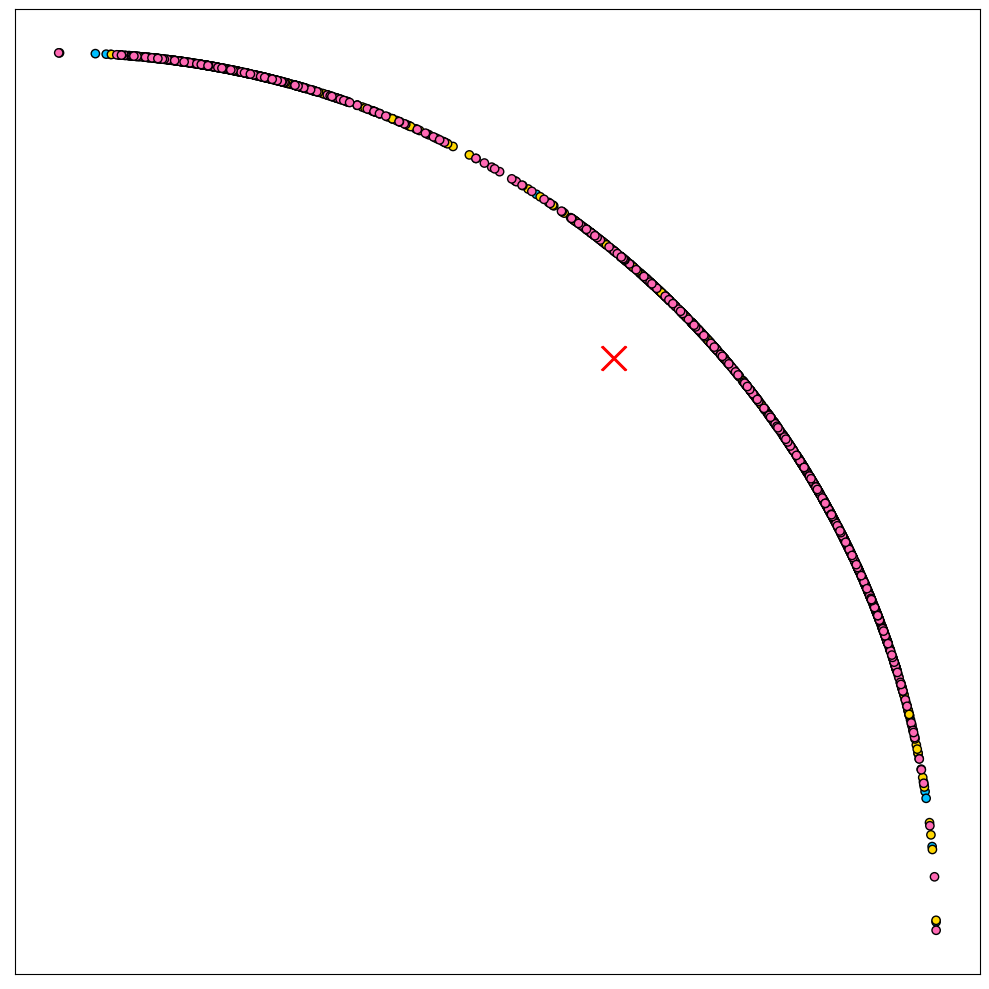

In [10]:
#visualization.makeExcel()
#visualization.plot_tsne(mlp=True)
visualization.plot(mlp=True)

In [11]:
import scipy.stats as stats

# Define a probability distribution (replace this with your own probabilities)
probs = [0.8, 0.1, 0.1]

# Calculate entropy
entropy_value = stats.entropy(probs, base=2)  # You can specify the base of the logarithm (default is natural logarithm)

print("Entropy:", entropy_value)


Entropy: 0.9219280948873624
